In [115]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [116]:
time_Euler = 0
time_Adams = 0

N = [5, 10, 20, 50, 100]
A = [[3, 2], [7, 1]]

In [117]:
def phi1(x):
    return 2*(math.sqrt(x+1) - 1)
def phi2(x):
    return math.log(x+1)

In [118]:
def phi1_diff(x):
    return 1/math.sqrt(x+1)
def phi2_diff(x):
    return 1/(x+1)

In [119]:
def F(x, A, u1, u2):
    F = [0, 0]
    F[0] = phi1_diff(x) + A[0][0]*phi1(x) + A[0][1]*phi2(x) - A[0][0]*u1 - A[0][1]*u2
    F[1] = phi2_diff(x) + A[1][0]*phi1(x) + A[1][1]*phi2(x) - A[1][0]*u1 - A[1][1]*u2
    return F

In [120]:
#Запишем реальный ответ

In [121]:
def answer(N):
  u1_exact = [0]*N
  u2_exact = [0]*N
  x = np.linspace(0, 1, N)
  for i in range(N):
    u1_exact[i] =  2*(math.sqrt(x[i]+1) - 1)
    u2_exact[i] =  math.log(x[i]+1)
  u_exact = [u1_exact, u2_exact]
  return u_exact

In [122]:
#Невный метод Эйлера (см. Михайлов 30 стр)

In [123]:
def Euler(N, x, A):
    u1 = [0]*N
    u2 = [0]*N
    h = 1/(N-1)

    for i in range(N-1):
        delta = (1+h*A[0][0])*(1+h*A[1][1]) - h**2*A[0][1]*A[1][0]
        w1 = u1[i] + h*(phi1_diff(x[i+1]) + A[0][0]*phi1(x[i+1]) + A[0][1]*phi2(x[i+1]))
        w2 = u2[i] + h*(phi2_diff(x[i+1]) + A[1][0]*phi1(x[i+1]) + A[1][1]*phi2(x[i+1]))

        u1[i+1] = ((1+h*A[1][1])*w1 - h*A[0][1]*w2)/delta
        u2[i+1] = (-h*A[1][0]*w1 + (1+h*A[0][0])*w2)/delta

    u = [u1, u2]
    return u

In [124]:
# Явный метод Адамса

In [125]:
def Adams(N, x, A):
    u1 = [0]*N
    u2 = [0]*N
    h = 1/(N-1)
    
#Зададим первые узлы с помощью трехшагового метода Рунге-Кутты
    k1 = [0, 0]
    k2 = [0, 0]
    k3 = [0, 0]
    for i in range(3):
        k1[0] = h*F(x[i], A, u1[i], u2[i])[0]
        k1[1] = h*F(x[i], A, u1[i], u2[i])[1]
        k2[0] = h*F(x[i] + h/2, A, u1[i] + k1[0]/2, u2[i] + k1[1]/2)[0]
        k2[1] = h*F(x[i] + h/2, A, u1[i] + k1[0]/2, u2[i] + k1[1]/2)[1]
        k3[0] = h*F(x[i] + h, A, u1[i] - k1[0] + 2*k2[0], u2[i] - k1[1] + 2*k2[1])[0]
        k3[1] = h*F(x[i] + h, A, u1[i] - k1[0] + 2*k2[0], u2[i] - k1[1] + 2*k2[1])[1]

        #Получаем новые y_j
        u1[i+1] = u1[i] + (k1[0] + 4*k2[0] + k3[0])/6
        u2[i+1] = u2[i] + (k1[1] + 4*k2[1] + k3[1])/6

        
    #Вычисляем новые 
    F0_1 = F(x[0], A, u1[0], u2[0])[0]
    F1_1 = F(x[1], A, u1[1], u2[1])[0]
    F2_1 = F(x[2], A, u1[2], u2[2])[0]
    F3_1 = F(x[3], A, u1[3], u2[3])[0]
    F0_2 = F(x[0], A, u1[0], u2[0])[1]
    F1_2 = F(x[1], A, u1[1], u2[1])[1]
    F2_2 = F(x[2], A, u1[2], u2[2])[1]
    F3_2 = F(x[3], A, u1[3], u2[3])[1]


    for i in range(N-4):
        if (i!=0):
            #Сдвигаем, получаем новые y_j, y_j-1,..
            F0_1 = F1_1
            F1_1 = F2_1
            F2_1 = F3_1
            F3_1 = F(x[i+3], A, u1[i+3], u2[i+3])[0]
            
            F0_2 = F1_2
            F1_2 = F2_2
            F2_2 = F3_2
            F3_2 = F(x[i+3], A, u1[i+3], u2[i+3])[1]

        #Применяем метод Адамса
        u1[i+4]=u1[i+3] + h/24 * (55*F3_1 - 59*F2_1 + 37*F1_1 - 9*F0_1)
        u2[i+4]=u2[i+3] + h/24 * (55*F3_2 - 59*F2_2 + 37*F1_2 - 9*F0_2)

    u = [u1, u2]
    return u

In [126]:
#Получим и проанализируем результаты

In [127]:
x_1 = np.linspace(0, 1, N[0])
u_Euler_1 = Euler(N[0], x_1, A)
u_Adams_1 = Adams(N[0], x_1, A)

x_2 = np.linspace(0, 1, N[1])
u_Euler_2 = Euler(N[1], x_2, A)
u_Adams_2 = Adams(N[1], x_2, A)

x_3 = np.linspace(0, 1, N[2])
u_Euler_3 = Euler(N[2], x_3, A)
u_Adams_3 = Adams(N[2], x_3, A)

x_4 = np.linspace(0, 1, N[3])
u_Euler_4 = Euler(N[3], x_4, A)
u_Adams_4 = Adams(N[3], x_4, A)

x_5 = np.linspace(0, 1, N[4])
u_Euler_5 = Euler(N[4], x_5, A)
u_Adams_5 = Adams(N[4], x_5, A)

In [128]:
#Эйлера

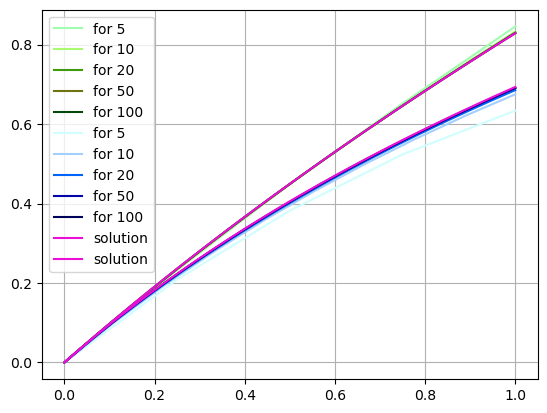

In [136]:
x1 = np.linspace(0, 1, 100)

fig = plt.subplots()
plt.plot(x_1,u_Euler_1[0], 'xkcd:mint', label = 'for 5')
plt.plot(x_2,u_Euler_2[0], 'xkcd:spring green', label = 'for 10')
plt.plot(x_3,u_Euler_3[0], 'xkcd:grass green', label = 'for 20')
plt.plot(x_4,u_Euler_4[0], 'xkcd:olive', label = 'for 50')
plt.plot(x_5,u_Euler_5[0], 'xkcd:forest green', label = 'for 100')
plt.plot(x_1,u_Euler_1[1], 'xkcd:pale blue', label = 'for 5')
plt.plot(x_2,u_Euler_2[1], 'xkcd:baby blue', label = 'for 10')
plt.plot(x_3,u_Euler_3[1], 'xkcd:bright blue', label = 'for 20')
plt.plot(x_4,u_Euler_4[1], 'xkcd:royal blue', label = 'for 50')
plt.plot(x_5,u_Euler_5[1], 'xkcd:dark blue', label = 'for 100')
plt.plot(x1,answer(100)[0], 'xkcd:fuchsia', label = 'solution')
plt.plot(x1,answer(100)[1], 'xkcd:fuchsia', label = 'solution')
plt.legend()
plt.grid(True)
plt.show()

10            0.018821118627385034
20            0.00795788395650365
40            0.0036995814129133758
80            0.0017875632028670194
160            0.0008790498550925299
Порядок сходимости:  1.2418956101271905
Порядок сходимости:  1.10502281446472
Порядок сходимости:  1.049367794888047
Порядок сходимости:  1.0239773572673843


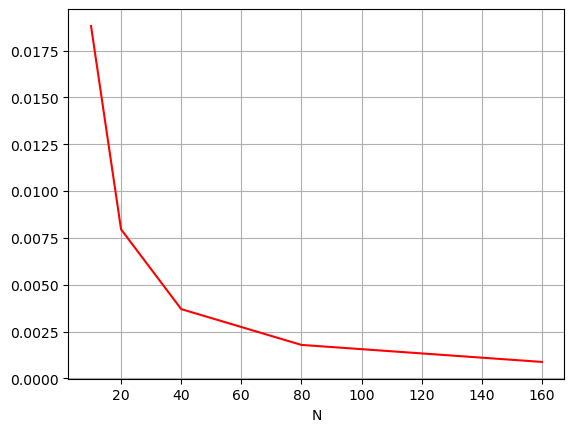

In [130]:
  N = [10, 20, 40, 80, 160]
  A = [[3, 2], [7, 1]]
  Err = [0]*5
  for i in range(5):
    x = np.linspace(0, 1, N[i])
    u = Euler(N[i], x, A)
    u_exact = answer(N[i])
    max_err = 0
    for j in range(N[i]):
      err1 = abs(u[0][j]-u_exact[0][j])
      err2 = abs(u[1][j]-u_exact[1][j])
      err = math.sqrt(err1**2 + err2**2)
      if (err > max_err):
        max_err = err
    Err[i] = max_err    
    print(N[i], '          ' ,max_err) 
  
  print("Порядок сходимости: ", math.log2(Err[0]/Err[1]))
  print("Порядок сходимости: ", math.log2(Err[1]/Err[2]))
  print("Порядок сходимости: ", math.log2(Err[2]/Err[3]))
  print("Порядок сходимости: ", math.log2(Err[3]/Err[4]))  
    
  plt.plot(N, Err, color='red')
  plt.grid() 
  plt.xlabel('Ошибка')
  plt.xlabel('N')
  plt.show()

In [131]:
#Адамса

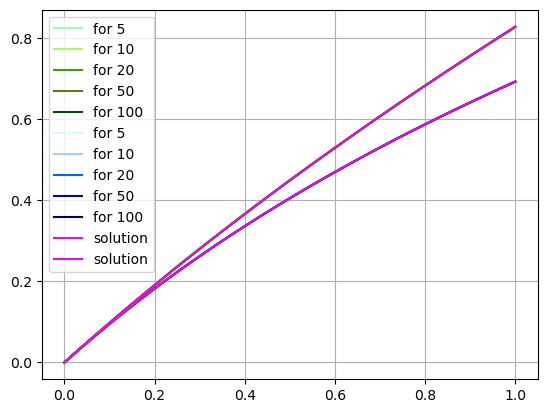

In [137]:
fig = plt.subplots()
plt.plot(x_1,u_Adams_1[0], 'xkcd:mint', label = 'for 5')
plt.plot(x_2,u_Adams_2[0], 'xkcd:spring green', label = 'for 10')
plt.plot(x_3,u_Adams_3[0], 'xkcd:grass green', label = 'for 20')
plt.plot(x_4,u_Adams_4[0], 'xkcd:olive', label = 'for 50')
plt.plot(x_5,u_Adams_5[0], 'xkcd:forest green', label = 'for 100')
plt.plot(x_1,u_Adams_1[1], 'xkcd:pale blue', label = 'for 5')
plt.plot(x_2,u_Adams_2[1], 'xkcd:baby blue', label = 'for 10')
plt.plot(x_3,u_Adams_3[1], 'xkcd:bright blue', label = 'for 20')
plt.plot(x_4,u_Adams_4[1], 'xkcd:royal blue', label = 'for 50')
plt.plot(x_5,u_Adams_5[1], 'xkcd:dark blue', label = 'for 100')
plt.plot(x1,answer(100)[0], 'xkcd:fuchsia', label = 'solution')
plt.plot(x1,answer(100)[1], 'xkcd:fuchsia', label = 'solution')
plt.legend()
plt.grid(True)
plt.show()

10            0.0013321932647941653
20            2.2669780291952497e-05
40            1.5521609242989119e-06
80            1.0167526051792058e-07
160            6.5076635572897224e-09
Порядок сходимости:  5.876889173924403
Порядок сходимости:  3.8684203634887697
Порядок сходимости:  3.9322375479499976
Порядок сходимости:  3.965685210751991


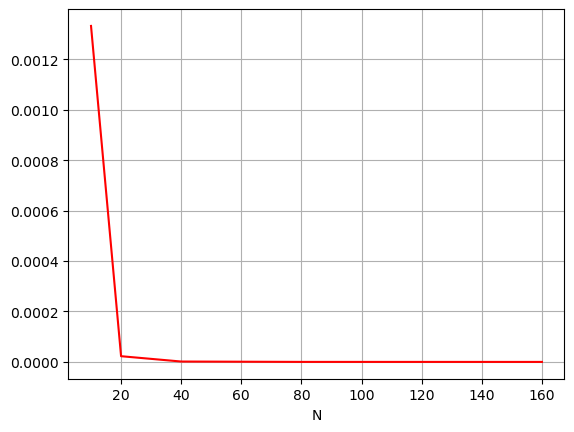

In [133]:
  N = [10, 20, 40, 80, 160]
  A = [[3, 2], [7, 1]]
  Err = [0]*5
  for i in range(5):
    x = np.linspace(0, 1, N[i])
    u = Adams(N[i], x, A)
    u_exact = answer(N[i])
    max_err = 0
    for j in range(N[i]):
      err1 = abs(u[0][j]-u_exact[0][j])
      err2 = abs(u[1][j]-u_exact[1][j])
      err = math.sqrt(err1**2 + err2**2)
      if (err > max_err):
        max_err = err
    Err[i] = max_err    
    print(N[i], '          ' ,max_err) 
    
  print("Порядок сходимости: ", math.log2(Err[0]/Err[1]))
  print("Порядок сходимости: ", math.log2(Err[1]/Err[2]))
  print("Порядок сходимости: ", math.log2(Err[2]/Err[3]))
  print("Порядок сходимости: ", math.log2(Err[3]/Err[4])) 
    
  plt.plot(N, Err, color='red')
  plt.grid() 
  plt.xlabel('Ошибка')
  plt.xlabel('N')
  plt.show()

In [135]:
    # Фиксируем ошибку 10**(-7). Теоретически подсчитали N1 и N2.
    N1 = 1440000
    N2 = 80
    A = [[3, 2], [7, 1]]

    global time_Adams
    st = time.time()
    xA = np.linspace(0, 1, N2)
    print('Для метода Адамса N =', N2)
    Adams(N2, xA, A)
    et = time.time()
    time_Adams = (et - st)*1000
    print('Время исполнения метода Адамса:', time_Adams, 'миллисекунд.')
    
    global time_Euler
    st = time.time()
    xE = np.linspace(0, 1, N1)
    print('Для метода Эйлера N =', N1)
    Euler(N1, xE, A)
    et = time.time()
    time_Euler = (et - st)*1000
    print('Время исполнения метода Эйлера:', time_Euler, 'миллисекунд.')

Для метода Адамса N = 80
Время исполнения метода Адамса: 2.012491226196289 миллисекунд.
Для метода Эйлера N = 1440000
Время исполнения метода Эйлера: 10086.473941802979 миллисекунд.
